In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

This classification assignment will use the CIFAR 10 library which is part of Keras. https://www.cs.toronto.edu/~kriz/cifar.html CIFAR 10 is a collection of 50,000 training and 10,000 test images of 10 differnt classes of objects.  Using convolutional neural networks (convets, or CNN) to get the model accuracy above 80%

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend, models, layers, regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

TensorFlow 2.x selected.


In [2]:
# Load the CIFAR 10 library from Keras
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


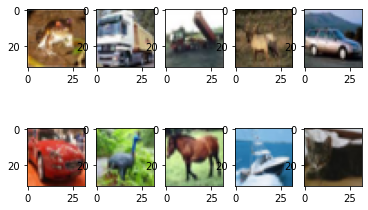

In [3]:
# View a few of the images
# 5 points
for i in range(10):
	plt.subplot(2, 5, i + 1)
	plt.imshow(train_images[i])
plt.show()

In [0]:
# Prepare the train and test images for a CNN
train_images =  train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32')/train_images.max()

test_images =  test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32')/test_images.max()

In [0]:
# Prepare the train and test data for a CNN
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
# Split the data into a train and validation block
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

### Review literature for CNN architectures and build at least 3 different architectures with varying depths, kernels, and normalization functions.  Be sure to split your data into a validation block and monitor loss and accuracy with graphs.  Build, compile, monitor, validate, and test each CNN architecture in one cell.  Try to get one of your CNN architectures to have a test accauracy above 80%.

#### Here are some links to get you started on reviewing CNN architectures.
#### https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
#### https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b 

Train on 50000 samples, validate on 12500 samples
Epoch 1/50
50000/50000 [==============================] - 33s 653us/sample - loss: 1.4223 - accuracy: 0.5003 - val_loss: 1.2649 - val_accuracy: 0.5777
Epoch 2/50
50000/50000 [==============================] - 24s 475us/sample - loss: 0.8529 - accuracy: 0.7076 - val_loss: 0.9253 - val_accuracy: 0.6874
Epoch 3/50
50000/50000 [==============================] - 24s 482us/sample - loss: 0.6570 - accuracy: 0.7778 - val_loss: 0.7981 - val_accuracy: 0.7281
Epoch 4/50
50000/50000 [==============================] - 24s 480us/sample - loss: 0.5270 - accuracy: 0.8220 - val_loss: 0.5044 - val_accuracy: 0.8286
Epoch 5/50
50000/50000 [==============================] - 24s 473us/sample - loss: 0.4164 - accuracy: 0.8585 - val_loss: 0.7189 - val_accuracy: 0.7564
Epoch 6/50
50000/50000 [==============================] - 24s 477us/sample - loss: 0.3267 - accuracy: 0.8891 - val_loss: 0.3257 - val_accuracy: 0.8913
Epoch 7/50
50000/50000 [====================

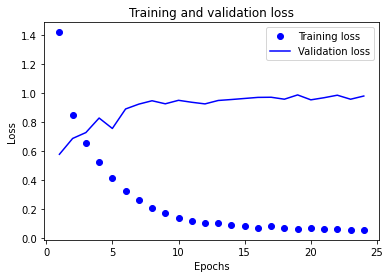

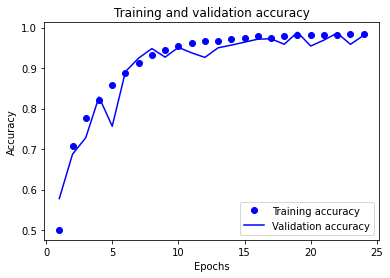

10000/10000 [==============================] - 2s 219us/sample - loss: 1.0320 - accuracy: 0.8302
test_acc: 0.8302


In [7]:
# Review literature for CNN arhcitectures.  

backend.clear_session()
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(256, (3,3), activation = 'relu', padding='same'))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(512, (3,3), activation = 'relu', padding='same'))
model.add(layers.Conv2D(512, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(train_images, 
          train_labels, 
          epochs = 50, 
          batch_size = 64,  
          validation_data=(x_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)